모두 크롭

Tag: bus, Probability: 1.00
Bounding Box - Left: 1183, Top: 5, Width: 105, Height: 74
Tag: bus, Probability: 1.00
Bounding Box - Left: 254, Top: 789, Width: 651, Height: 281
Tag: bus, Probability: 1.00
Bounding Box - Left: 1339, Top: 156, Width: 126, Height: 110
Tag: bus, Probability: 0.99
Bounding Box - Left: 1678, Top: 278, Width: 241, Height: 353
Tag: bus, Probability: 0.95
Bounding Box - Left: 1681, Top: 177, Width: 238, Height: 711
Tag: bus, Probability: 0.89
Bounding Box - Left: 1519, Top: 138, Width: 33, Height: 47
Tag: car, Probability: 1.00
Bounding Box - Left: 1243, Top: 78, Width: 68, Height: 48
Tag: car, Probability: 0.99
Bounding Box - Left: 829, Top: 319, Width: 189, Height: 308
Tag: car, Probability: 0.98
Bounding Box - Left: 1106, Top: 537, Width: 273, Height: 459
Tag: car, Probability: 0.97
Bounding Box - Left: 1136, Top: 30, Width: 41, Height: 38
Tag: car, Probability: 0.96
Bounding Box - Left: 1301, Top: 63, Width: 47, Height: 46
Tag: car, Probability: 0.94
Bounding 

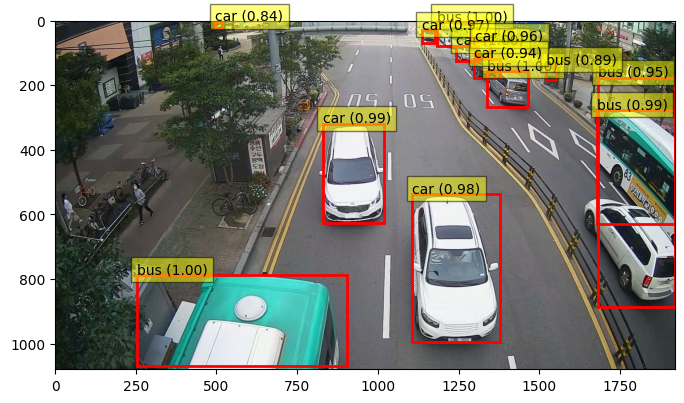

In [7]:
import os
from PIL import Image
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from azure.cognitiveservices.vision.customvision.prediction import CustomVisionPredictionClient
from msrest.authentication import ApiKeyCredentials

# Azure Custom Vision 정보

# API Key 설정
credentials = ApiKeyCredentials(in_headers={"Prediction-key": PREDICTION_KEY})

# Azure Custom Vision Prediction 클라이언트 생성
predictor = CustomVisionPredictionClient(ENDPOINT, credentials=credentials)

# 크롭된 이미지 저장 폴더
output_folder = r"data/cropped_images"  # 크롭된 이미지 저장 폴더
os.makedirs(output_folder, exist_ok=True)  # 폴더가 없으면 생성

# 바운딩 박스 좌표를 저장할 파일
output_txt = os.path.join(output_folder, "detections.txt")


# 사용자에게 이미지 파일 경로 입력 받기
image_path = r"data/test_images/11_1_세이브존_옆_고정1-20200921-075959-007_2870.jpg" # 예: r"data/blackbox_ss/sample_image.jpg"

# 파일 열기 (덮어쓰기 모드)
with open(output_txt, "w") as f:
    f.write("Filename,Tag,Probability,Left,Top,Width,Height\n")  # 헤더 추가

    # 이미지 파일 열기
    with open(image_path, "rb") as image_data:
        # Custom Vision 모델에 이미지 전송 및 예측
        results = predictor.detect_image(PROJECT_ID, PUBLISHED_MODEL_NAME, image_data)

    # 원본 이미지 로드
    image = Image.open(image_path)
    fig, ax = plt.subplots(1, figsize=(8, 6))
    ax.imshow(image)

    detected = False  # 감지 여부 체크
    base_name, ext = os.path.splitext(os.path.basename(image_path))  # 파일명과 확장자 분리

    # 바운딩 박스 처리
    for idx, prediction in enumerate(results.predictions):
        # 확신도 80% 이상인 경우만 크롭
        if prediction.probability > 0.8:
            # 기존 태그를 그대로 사용
            tag = prediction.tag_name

            # 바운딩 박스 좌표 변환 (비율 → 픽셀)
            left = int(prediction.bounding_box.left * image.width)
            top = int(prediction.bounding_box.top * image.height)
            width = int(prediction.bounding_box.width * image.width)
            height = int(prediction.bounding_box.height * image.height)


            # 바운딩 박스 추가 (시각화용)
            rect = patches.Rectangle((left, top), width, height, linewidth=2, edgecolor='red', facecolor='none')
            ax.add_patch(rect)

            # 텍스트 추가
            ax.text(left, top - 5, f"{tag} ({prediction.probability:.2f})",
                    bbox=dict(facecolor='yellow', alpha=0.5), fontsize=10, color='black')

            print(f"Tag: {tag}, Probability: {prediction.probability:.2f}")
            print(f"Bounding Box - Left: {left}, Top: {top}, Width: {width}, Height: {height}")

            # 감지된 객체 크롭
            cropped_img = image.crop((left, top, left + width, top + height))

            # RGBA 모드인 경우 RGB로 변환
            if cropped_img.mode in ['RGBA', 'P']:
                cropped_img = cropped_img.convert('RGB')

            # 바운딩 박스 인덱스를 파일명에 추가하여 저장
            cropped_img_path = os.path.join(output_folder, f"{base_name}_cropped_{idx}{ext}")
            cropped_img.save(cropped_img_path)

            # 바운딩 박스 좌표 저장 (기존 태그 사용)
            f.write(f"{os.path.basename(image_path)},{tag},{prediction.probability:.2f},{left},{top},{width},{height}\n")

            detected = True

2퍼센트 이상만 크롭

Tag: bus, Probability: 1.00
Bounding Box - Left: 254, Top: 789, Width: 651, Height: 281
Tag: bus, Probability: 0.99
Bounding Box - Left: 1678, Top: 278, Width: 241, Height: 353
Tag: bus, Probability: 0.95
Bounding Box - Left: 1681, Top: 177, Width: 238, Height: 711
Tag: car, Probability: 0.99
Bounding Box - Left: 829, Top: 319, Width: 189, Height: 308
Tag: car, Probability: 0.98
Bounding Box - Left: 1106, Top: 537, Width: 273, Height: 459


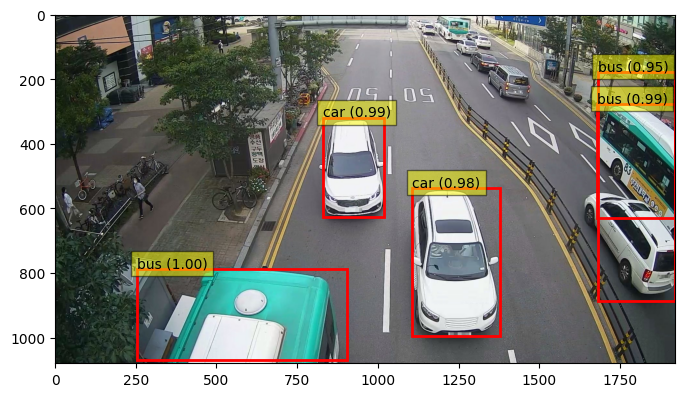

In [5]:
import os
from PIL import Image
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from azure.cognitiveservices.vision.customvision.prediction import CustomVisionPredictionClient
from msrest.authentication import ApiKeyCredentials

# Azure Custom Vision 정보

# API Key 설정
credentials = ApiKeyCredentials(in_headers={"Prediction-key": PREDICTION_KEY})

# Azure Custom Vision Prediction 클라이언트 생성
predictor = CustomVisionPredictionClient(ENDPOINT, credentials=credentials)

# 크롭된 이미지 저장 폴더
output_folder = r"data/cropped_images"  # 크롭된 이미지 저장 폴더
os.makedirs(output_folder, exist_ok=True)  # 폴더가 없으면 생성

# 바운딩 박스 좌표를 저장할 파일
output_txt = os.path.join(output_folder, "detections.txt")


# 사용자에게 이미지 파일 경로 입력 받기
image_path = r"data/test_images/11_1_세이브존_옆_고정1-20200921-075959-007_2870.jpg" # 예: r"data/blackbox_ss/sample_image.jpg"

# 파일 열기 (덮어쓰기 모드)
with open(output_txt, "w") as f:
    f.write("Filename,Tag,Probability,Left,Top,Width,Height\n")  # 헤더 추가

    # 이미지 파일 열기
    with open(image_path, "rb") as image_data:
        # Custom Vision 모델에 이미지 전송 및 예측
        results = predictor.detect_image(PROJECT_ID, PUBLISHED_MODEL_NAME, image_data)

    # 원본 이미지 로드
    image = Image.open(image_path)
    fig, ax = plt.subplots(1, figsize=(8, 6))
    ax.imshow(image)

    detected = False  # 감지 여부 체크
    base_name, ext = os.path.splitext(os.path.basename(image_path))  # 파일명과 확장자 분리

    # 바운딩 박스 처리
    for idx, prediction in enumerate(results.predictions):
        # 확신도 80% 이상인 경우만 크롭
        if prediction.probability > 0.8:
            # 기존 태그를 그대로 사용
            tag = prediction.tag_name

            # 바운딩 박스 좌표 변환 (비율 → 픽셀)
            left = int(prediction.bounding_box.left * image.width)
            top = int(prediction.bounding_box.top * image.height)
            width = int(prediction.bounding_box.width * image.width)
            height = int(prediction.bounding_box.height * image.height)

            # 크롭된 이미지가 전체 이미지의 2% 이상인지 확인
            cropped_area = width * height
            image_area = image.width * image.height
            if cropped_area / image_area < 0.02:
                continue  # 2% 미만이면 건너뜀

            # 바운딩 박스 추가 (시각화용)
            rect = patches.Rectangle((left, top), width, height, linewidth=2, edgecolor='red', facecolor='none')
            ax.add_patch(rect)

            # 텍스트 추가
            ax.text(left, top - 5, f"{tag} ({prediction.probability:.2f})",
                    bbox=dict(facecolor='yellow', alpha=0.5), fontsize=10, color='black')

            print(f"Tag: {tag}, Probability: {prediction.probability:.2f}")
            print(f"Bounding Box - Left: {left}, Top: {top}, Width: {width}, Height: {height}")

            # 감지된 객체 크롭
            cropped_img = image.crop((left, top, left + width, top + height))

            # RGBA 모드인 경우 RGB로 변환
            if cropped_img.mode in ['RGBA', 'P']:
                cropped_img = cropped_img.convert('RGB')

            # 바운딩 박스 인덱스를 파일명에 추가하여 저장
            cropped_img_path = os.path.join(output_folder, f"{base_name}_cropped_{idx}{ext}")
            cropped_img.save(cropped_img_path)

            # 바운딩 박스 좌표 저장 (기존 태그 사용)
            f.write(f"{os.path.basename(image_path)},{tag},{prediction.probability:.2f},{left},{top},{width},{height}\n")

            detected = True


2퍼센트 이상 버스 제외 크롭

Tag: car, Probability: 0.99
Bounding Box - Left: 829, Top: 319, Width: 189, Height: 308
Tag: car, Probability: 0.98
Bounding Box - Left: 1106, Top: 537, Width: 273, Height: 459


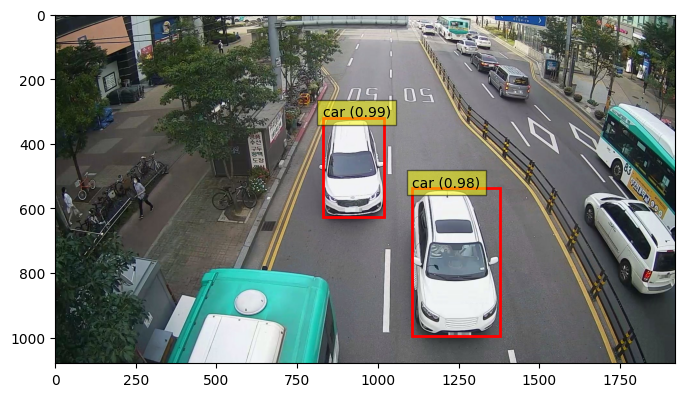

In [6]:
import os
from PIL import Image
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from azure.cognitiveservices.vision.customvision.prediction import CustomVisionPredictionClient
from msrest.authentication import ApiKeyCredentials

# Azure Custom Vision 정보

# API Key 설정
credentials = ApiKeyCredentials(in_headers={"Prediction-key": PREDICTION_KEY})

# Azure Custom Vision Prediction 클라이언트 생성
predictor = CustomVisionPredictionClient(ENDPOINT, credentials=credentials)

# 크롭된 이미지 저장 폴더
output_folder = r"data/cropped_images"  # 크롭된 이미지 저장 폴더
os.makedirs(output_folder, exist_ok=True)  # 폴더가 없으면 생성

# 바운딩 박스 좌표를 저장할 파일
output_txt = os.path.join(output_folder, "detections.txt")


# 사용자에게 이미지 파일 경로 입력 받기
image_path = r"data/test_images/11_1_세이브존_옆_고정1-20200921-075959-007_2870.jpg" # 예: r"data/blackbox_ss/sample_image.jpg"

# 파일 열기 (덮어쓰기 모드)
with open(output_txt, "w") as f:
    f.write("Filename,Tag,Probability,Left,Top,Width,Height\n")  # 헤더 추가

    # 이미지 파일 열기
    with open(image_path, "rb") as image_data:
        # Custom Vision 모델에 이미지 전송 및 예측
        results = predictor.detect_image(PROJECT_ID, PUBLISHED_MODEL_NAME, image_data)

    # 원본 이미지 로드
    image = Image.open(image_path)
    fig, ax = plt.subplots(1, figsize=(8, 6))
    ax.imshow(image)

    detected = False  # 감지 여부 체크
    base_name, ext = os.path.splitext(os.path.basename(image_path))  # 파일명과 확장자 분리

    # 바운딩 박스 처리
    for idx, prediction in enumerate(results.predictions):
        # 확신도 80% 이상인 경우만 크롭
        if prediction.probability > 0.8:
            # 기존 태그를 그대로 사용
            tag = prediction.tag_name

            # "bus" 태그인 경우 크롭을 건너뜀
            if tag == "bus":
                continue

            # 바운딩 박스 좌표 변환 (비율 → 픽셀)
            left = int(prediction.bounding_box.left * image.width)
            top = int(prediction.bounding_box.top * image.height)
            width = int(prediction.bounding_box.width * image.width)
            height = int(prediction.bounding_box.height * image.height)

            # 크롭된 이미지가 전체 이미지의 2% 이상인지 확인
            cropped_area = width * height
            image_area = image.width * image.height
            if cropped_area / image_area < 0.02:
                continue  # 2% 미만이면 건너뜀

            # 바운딩 박스 추가 (시각화용)
            rect = patches.Rectangle((left, top), width, height, linewidth=2, edgecolor='red', facecolor='none')
            ax.add_patch(rect)

            # 텍스트 추가
            ax.text(left, top - 5, f"{tag} ({prediction.probability:.2f})",
                    bbox=dict(facecolor='yellow', alpha=0.5), fontsize=10, color='black')

            print(f"Tag: {tag}, Probability: {prediction.probability:.2f}")
            print(f"Bounding Box - Left: {left}, Top: {top}, Width: {width}, Height: {height}")

            # 감지된 객체 크롭
            cropped_img = image.crop((left, top, left + width, top + height))

            # RGBA 모드인 경우 RGB로 변환
            if cropped_img.mode in ['RGBA', 'P']:
                cropped_img = cropped_img.convert('RGB')

            # 바운딩 박스 인덱스를 파일명에 추가하여 저장
            cropped_img_path = os.path.join(output_folder, f"{base_name}_cropped_{idx}{ext}")
            cropped_img.save(cropped_img_path)

            # 바운딩 박스 좌표 저장 (기존 태그 사용)
            f.write(f"{os.path.basename(image_path)},{tag},{prediction.probability:.2f},{left},{top},{width},{height}\n")

            detected = True
